# Indian air Pollution data analysis

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv (r'C:\Users\hhh\Desktop\folder\Air Pollution\dataset.csv')

C:\Users\hhh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Question 1: Find out the state which least polluted.

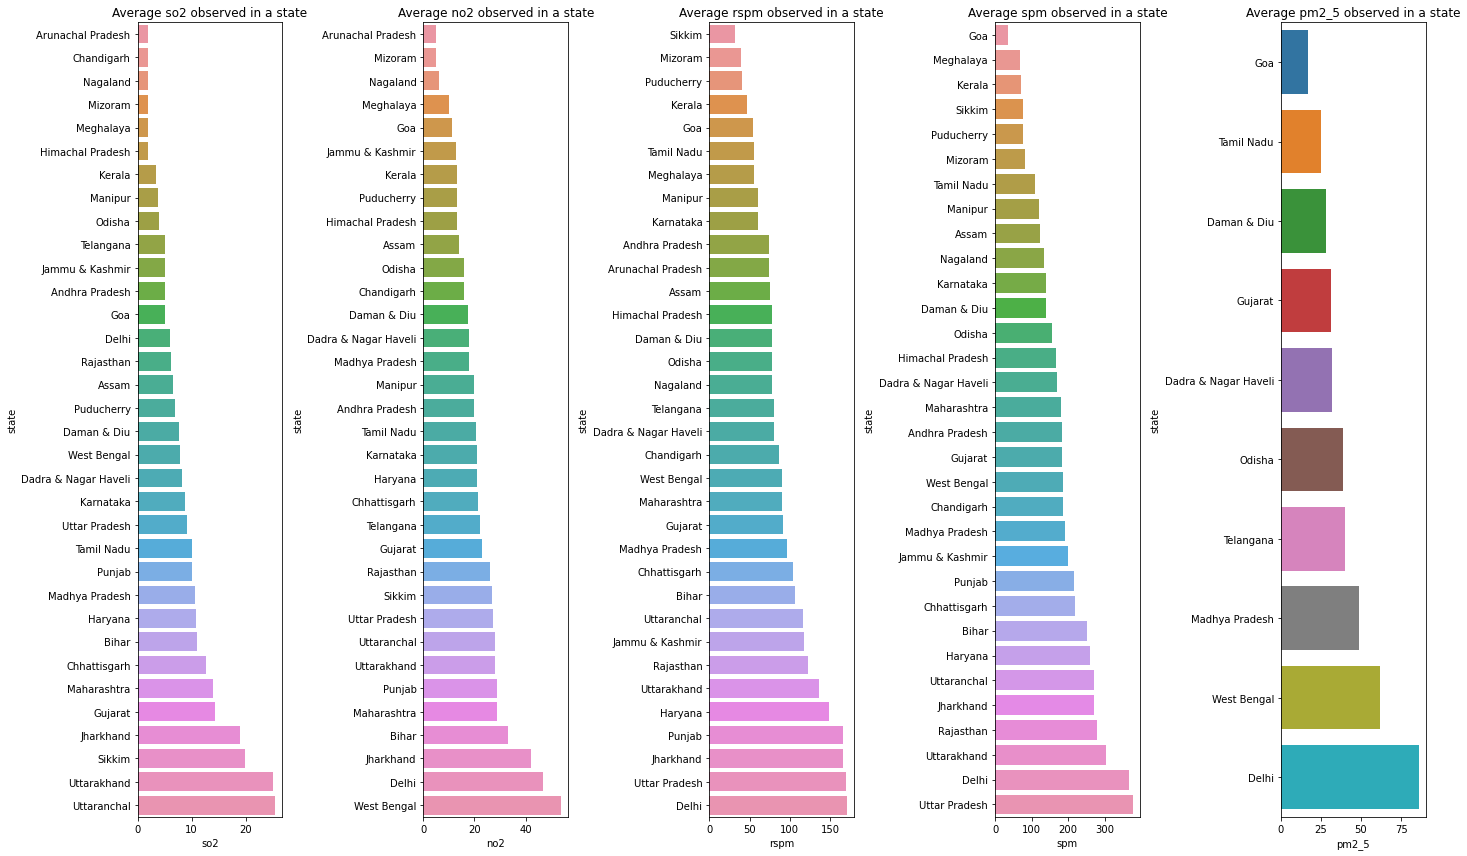

In [15]:
fig, axes= plt.subplots(figsize=(20, 12), ncols=5)
state_wise_max_so2 = df[['state','so2']].dropna().groupby('state').median().sort_values(by='so2')
state_wise_max_no2 = df[['state','no2']].dropna().groupby('state').median().sort_values(by='no2')
state_wise_max_rspm = df[['state','rspm']].dropna().groupby('state').median().sort_values(by='rspm')
state_wise_max_spm = df[['state','spm']].dropna().groupby('state').median().sort_values(by='spm')
state_wise_max_pm2_5 = df[['state','pm2_5']].dropna().groupby('state').median().sort_values(by='pm2_5')

sns.barplot(x='so2', y=state_wise_max_so2.index, data=state_wise_max_so2, ax=axes[0])
axes[0].set_title("Average so2 observed in a state")

sns.barplot(x='no2', y=state_wise_max_no2.index, data=state_wise_max_no2, ax=axes[1])
axes[1].set_title("Average no2 observed in a state")

sns.barplot(x='rspm', y=state_wise_max_rspm.index, data=state_wise_max_rspm, ax=axes[2])
axes[2].set_title("Average rspm observed in a state")

sns.barplot(x='spm', y=state_wise_max_spm.index, data=state_wise_max_spm, ax=axes[3])
axes[3].set_title("Average spm observed in a state")

sns.barplot(x='pm2_5', y=state_wise_max_pm2_5.index, data=state_wise_max_pm2_5, ax=axes[4])
axes[4].set_title("Average pm2_5 observed in a state")
plt.tight_layout()

##GOA looks a suitable location overall.

##Question 2: Top TEN Cities have highest risk of respiratory diseases

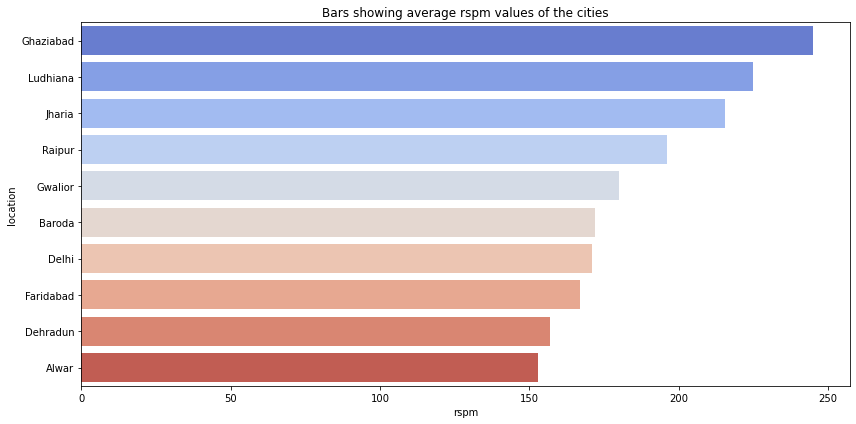

In [29]:
state = df[['state','location','rspm']].groupby(['state','location']).median().reset_index()
state_location_max_rspm = state.loc[state.groupby('state')['rspm'].idxmax()].sort_values(by='rspm', ascending=False).head(10)
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='rspm', y= 'location', data=state_location_max_rspm, palette='coolwarm', axes=ax)
ax.set_title("Bars showing average rspm values of the cities")
plt.tight_layout()

In [30]:
state_location_max_rspm

,state,location,rspm
280,Uttar Pradesh,Ghaziabad,245.0
241,Punjab,Ludhiana,225.0
114,Jharkhand,Jharia,215.5
53,Chhattisgarh,Raipur,196.0
159,Madhya Pradesh,Gwalior,180.0
82,Gujarat,Baroda,172.0
59,Delhi,Delhi,171.0
95,Haryana,Faridabad,167.0
296,Uttarakhand,Dehradun,157.0
245,Rajasthan,Alwar,153.0


##Question 3: Show RSPM variation in ghaziabad over time

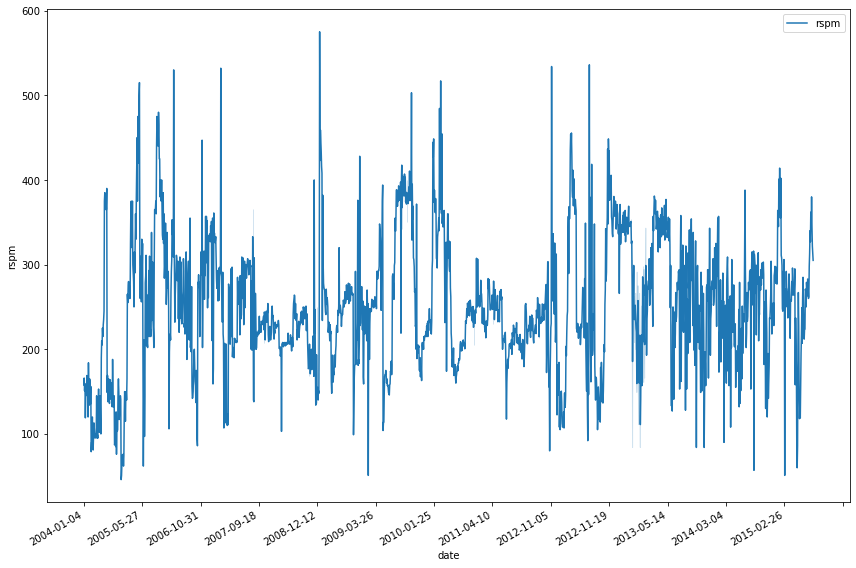

In [37]:
rspm_data = df[df['location']=="Ghaziabad"][['date', 'rspm']].dropna()
fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
sns.lineplot(x='date', y='rspm', data=rspm_data, axes=ax, label="rspm")
fig.autofmt_xdate()
plt.tight_layout()

In [38]:

rspm_data

,date,rspm
371649,2004-01-04,158.0
371650,2004-05-04,166.0
371651,2004-08-04,151.0
371652,2004-12-04,159.0
371653,2004-04-15,119.0
...,...,...
407896,2015-12-14,380.0
407897,2015-12-17,345.0
407898,2015-12-21,322.0
407899,2015-12-28,313.0


##Question 4: Top five states with highest number of monitoring stations

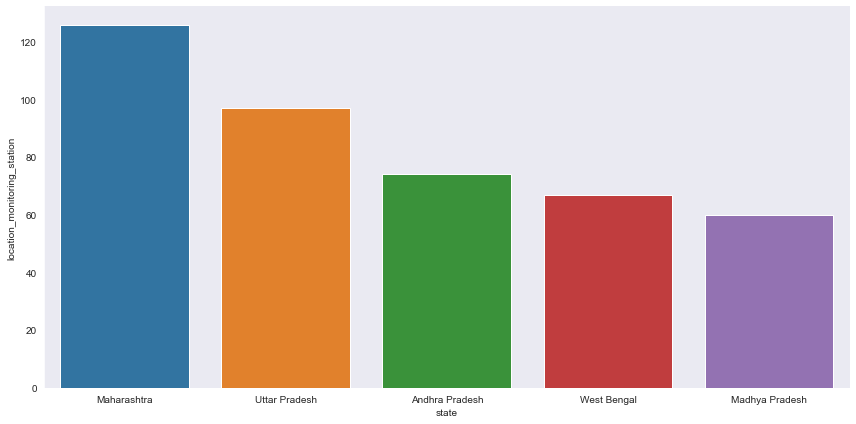

In [43]:
mon_station = df.drop_duplicates(subset=['location_monitoring_station'])
grouped_mon_station= mon_station[['state', 'location_monitoring_station']].groupby('state').count().sort_values(by='location_monitoring_station', ascending=False).head(5)
fig,ax = plt.subplots(figsize=(12,6))
sns.set_style("dark")
sns.barplot(x=grouped_mon_station.index, y='location_monitoring_station', data=grouped_mon_station, axes=ax)
sns.despine()
plt.tight_layout()

In [41]:
grouped_mon_station

,location_monitoring_station
state,
Maharashtra,126
Uttar Pradesh,97
Andhra Pradesh,74
West Bengal,67
Madhya Pradesh,60
